## Identifying the Optimal Location for Developing a New Oil Well for Oily Giant Mining Company

## Introduction
#### The purpose of this project is to find the location for new well for OilyGiant mining company. My machine learning model will help to pick the most volume and quality creating new oil location. This will help the company to create highest revenue and eventually help with the company growth.


In [1]:
## installing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from pandas.plotting import scatter_matrix

import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
### reading all the csv files into dataframe
geo_0 = pd.read_csv('geo_data_0.csv')
geo_1 = pd.read_csv('geo_data_1.csv')
geo_2 = pd.read_csv('geo_data_2.csv')

In [3]:
## looking at data types
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
## looking at descriptive statistics of dataframe
geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
## looking at row details
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
## looking at data types
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
## looking at descriptive statistics of dataframe
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
## looking at row details
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
## looking at data types
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
## looking at descriptive statistics of dataframe
geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
## looking at row details
geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


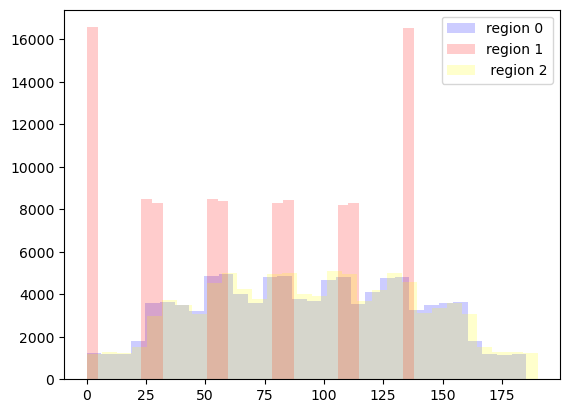

In [12]:
## plotting the all three regions on histogram
plt.hist(geo_0['product'], alpha =0.2, bins=30, color='blue');
plt.hist(geo_1['product'], alpha=0.2, bins=30, color='red');
plt.hist(geo_2['product'], alpha=0.2, bins=30, color='yellow');
plt.legend(['region 0', 'region 1',' region 2'])
         

### By looking at above graph we can see region 0 and region 2 are pretty similar. But region 1 has some reserves which are pretty high.

Text(0.5, 1.0, 'Product by Region')

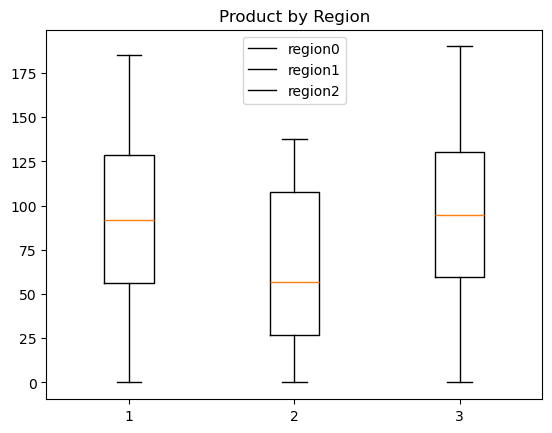

In [13]:
plt.boxplot([geo_0['product'], geo_1['product'], geo_2['product']])
plt.legend(['region0', 'region1', 'region2'])
plt.title('Product by Region')

#### Box plot graph showed that products were analyzed by regions. Region 0 & Region 2 have almost same mean around 90.  Mean of Region 1 is lowest among all three and it is around 53.

## Region 0

In [14]:
geo_0.drop(columns=['id'], inplace=True)        

In [15]:
geo_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


#### For region 0 f2  and product are very little positively correlated.

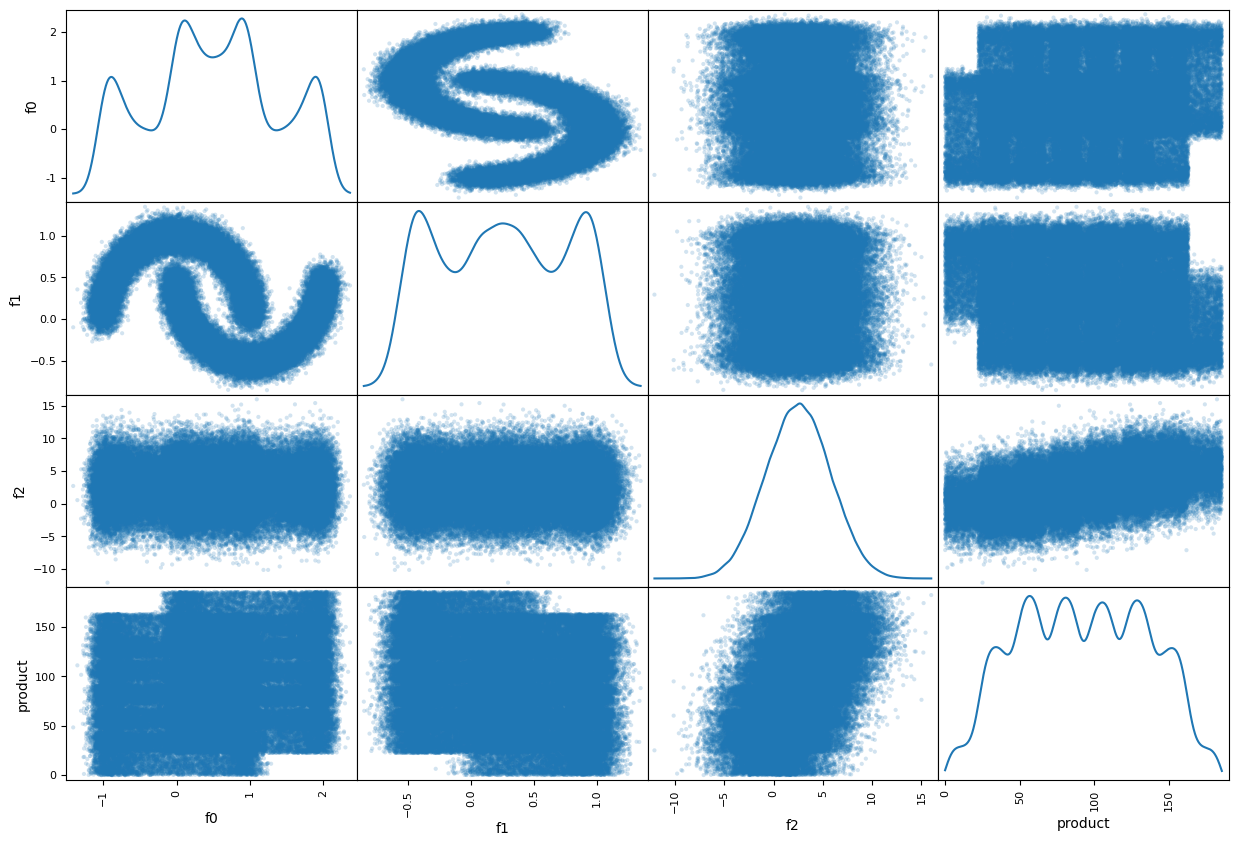

In [16]:
scatter_matrix(geo_0, alpha=0.2, figsize=(15, 10), diagonal="kde");


In [17]:
## assigning variables
features0= geo_0.drop(['product'], axis=1)
target0 = geo_0['product']

## Splitting data set training set 75% and validation set 25 %

In [18]:
features0_train, features0_valid, target0_train, target0_valid= train_test_split(features0, target0, test_size=0.25, random_state=42)


In [19]:
## Telling us know dimesions of the split sets
print(features0_train.shape)
print(features0_valid.shape)
print(target0_train.shape)
print(target0_valid.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [20]:
numeric = ['f0','f1','f2']
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scaler.fit(features0_train[numeric])
features0_valid[numeric] = scaler.transform(features0_valid[numeric])


In [21]:
## creating linear regression model
model = LinearRegression()
model.fit(features0_train, target0_train)
model.score(features0_valid, target0_valid)

0.01830669021305653

## It is very bad model choice to represent for the  data frame(geo_0)as the accuracy is very low of 1 %.

<Axes: >

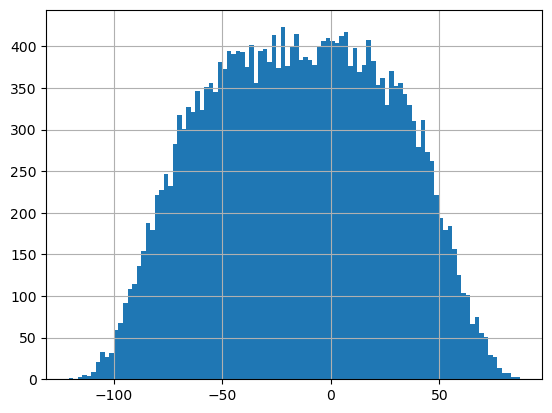

In [22]:
(model.predict(features0_valid)- target0_valid).hist(bins=100)

In [23]:
## creating new dataframe to look at predicted and actual volume of oil reserves in oil well 
r0_vals= pd.DataFrame()
r0_vals['predicted'] = model.predict(features0)
r0_vals['actual'] = target0.values
r0_vals

,predicted,actual
0,95.521901,105.280062
1,116.413581,73.037750
2,88.780551,85.265647
3,95.199680,168.620776
4,114.401300,154.036647
...,...,...
99995,116.159301,110.744026
99996,96.858167,122.346843
99997,72.453801,64.375443
99998,99.472641,74.040764


In [24]:
mse0 = mean_squared_error(r0_vals['predicted'], r0_vals['actual'])
RMSE0 = mse0** 0.5
RMSE0

37.69204280325303

In [25]:
r0_top200_sum = r0_vals.sample(500).sort_values('predicted', ascending =False).iloc[0:200].actual.sum()
r0_top200_sum

23292.922396903858

In [26]:
r0_top200 = r0_vals.sample(500).sort_values('predicted', ascending =False).iloc[0:200].actual
r0_top200

22500    155.212534
93118    146.859989
26720    170.263957
45582    120.733116
36960    178.347036
            ...    
65794     82.133657
46833    129.569389
44238    127.244077
86732     84.611510
87839    155.746468
Name: actual, Length: 200, dtype: float64

In [27]:
r0_mean = r0_top200_sum/ 200
r0_mean

116.4646119845193

## Region 1

In [28]:
geo_1.drop(columns=['id'], inplace=True)    


In [29]:
geo_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


#### For region 1  f2  and product are highly positively correlated.

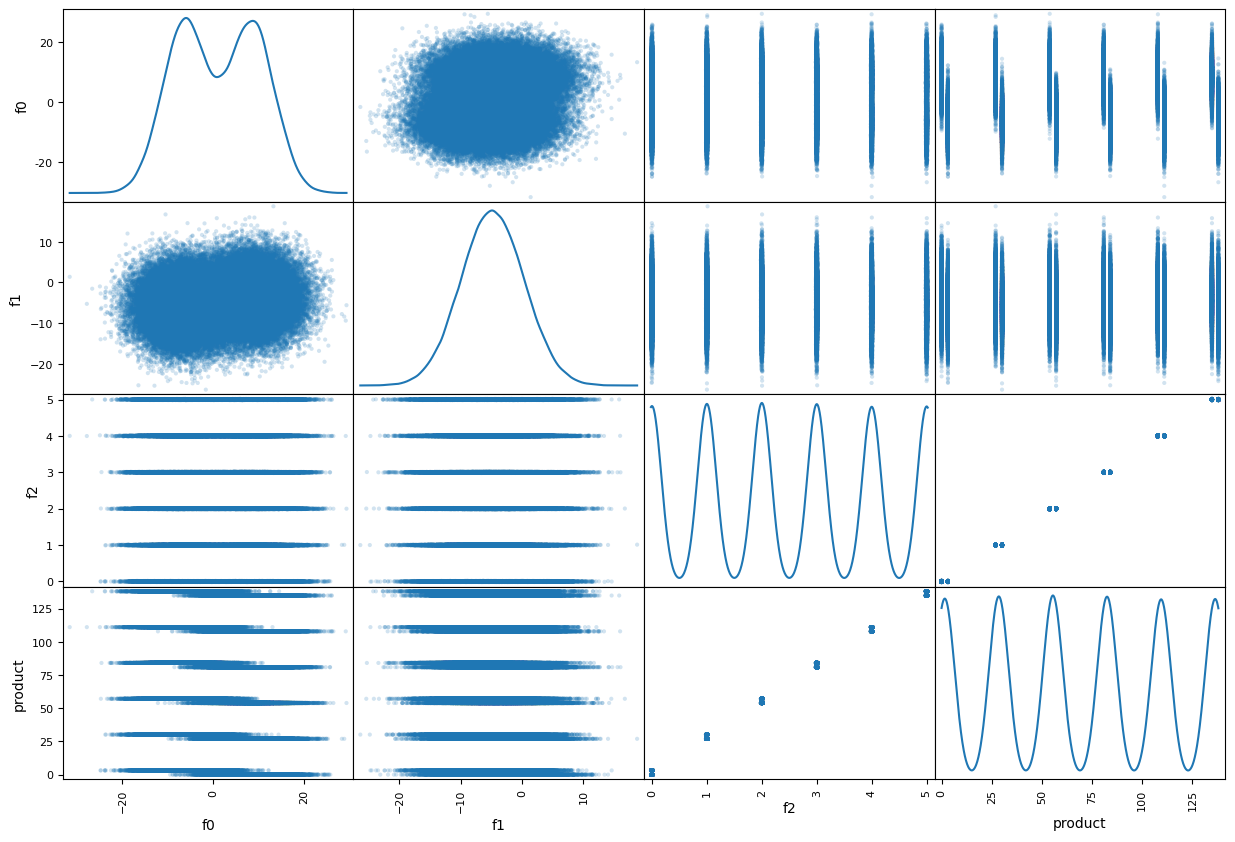

In [30]:
scatter_matrix(geo_1, alpha=0.2, figsize=(15, 10), diagonal="kde");

In [31]:
## assigning variables
features1= geo_1.drop(['product'], axis=1)
target1= geo_1['product']

## Splitting data set training set 75% and validation set 25 %

In [32]:
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, target1, test_size=0.25, random_state=42)

In [33]:
## Telling us know dimesions of the split sets
print(features1_train.shape)
print(features1_valid.shape)
print(target1_train.shape)
print(target1_valid.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [34]:
numeric = ['f0','f1','f2']
scaler = StandardScaler()
scaler.fit(features1_train[numeric])
features1_valid[numeric] = scaler.transform(features1_valid[numeric])

In [35]:
## creating Linear Regression model
model = LinearRegression()
model.fit(features1_train, target1_train)
model.score(features1_valid, target1_valid)

-1.3079473483775903

## It is very bad model choice to represent for the  data frame(geo_1)as the accuracy is negative.

In [36]:
(model.predict(features1_valid)- target1_valid).std()

19.01422841762978

<Axes: >

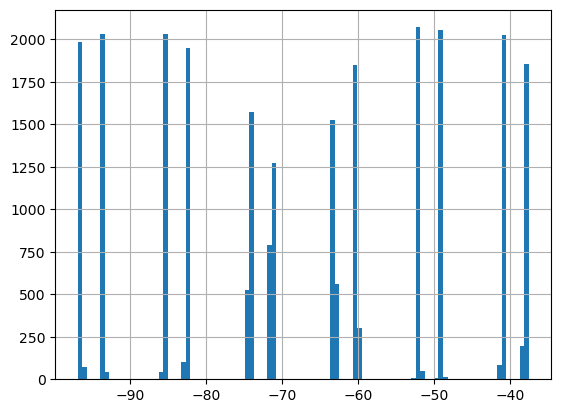

In [37]:
(model.predict(features1_valid)- target1_valid).hist(bins=100)

In [38]:
## creating new dataframe to look at predicted and actual volume of oil reserves in oil well 
r1_vals = pd.DataFrame()
r1_vals['predicted'] = model.predict(features1)
r1_vals['actual'] = target1.values
r1_vals

,predicted,actual
0,3.842537,3.179103
1,26.585852,26.953261
2,135.665780,134.766305
3,138.542435,137.945408
4,134.866656,134.766305
...,...,...
99995,54.275193,53.906522
99996,138.308191,137.945408
99997,137.512981,137.945408
99998,28.641590,30.132364


In [39]:
mse1 = mean_squared_error(r1_vals['predicted'], r1_vals['actual'])
RMSE1 = mse1 ** 0.5
RMSE1

0.8903847559707259

## This model for r1 has least error which is the bset model.

In [40]:
r1_top200_sum= r1_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].actual.sum()
r1_top200_sum

23294.94328937681

In [41]:
r1_top200= r1_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].actual
r1_top200

30936    137.945408
16330    137.945408
50829    137.945408
24996    137.945408
59892    137.945408
            ...    
41004     84.038886
23760     84.038886
8131      84.038886
88961     84.038886
64945     84.038886
Name: actual, Length: 200, dtype: float64

In [42]:
r1_mean = r1_top200_sum/200
r1_mean

116.47471644688405

## Region 2

In [43]:
geo_2.drop(columns=['id'], inplace=True)

In [44]:
geo_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


#### For region 2  f2  and product are very little positively correlated.

In [45]:
## assigning variables
features2= geo_2.drop(['product'], axis=1)
target2= geo_2['product']

## Splitting data set training set 75% and validation set 25 %

In [46]:
features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, target2, test_size=0.25, random_state=42)

In [47]:
## Telling us know dimesions of the split sets
print(features2_train.shape)
print(features2_valid.shape)
print(target2_train.shape)
print(target2_valid.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [48]:
## creating linear regression model
model = LinearRegression()
model.fit(features2_train, target2_train)
model.score(features2_valid, target2_valid)

0.19634705977280487

## It is very bad model choice to represent for the  data frame(geo_2)as the accuracy is very low of 19 %. But it is still beeter than geo_0 and geo_1

In [49]:
(model.predict(features2_valid)- target2_valid).std()

40.14487696999909

<Axes: >

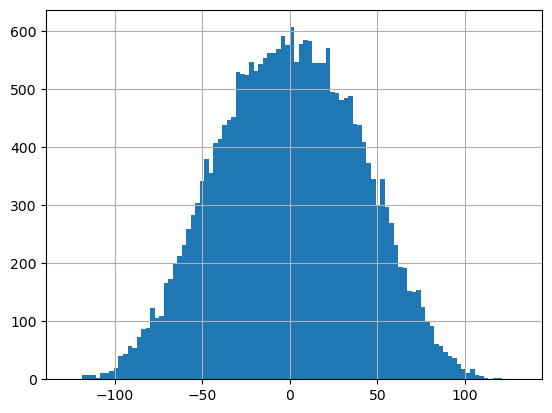

In [50]:
(model.predict(features2_valid)- target2_valid).hist(bins=100)

In [51]:
numeric = ['f0','f1','f2']
scaler = StandardScaler()
scaler.fit(features2_train[numeric])
features2_valid[numeric] = scaler.transform(features2_valid[numeric])

In [52]:
## creating new dataframe to look at predicted and actual volume of oil reserves in oil well 
r2_vals= pd.DataFrame()
r2_vals['predicted'] = model.predict(features2)
r2_vals['actual'] = target2.values
r2_vals

,predicted,actual
0,75.872848,27.758673
1,65.982700,56.069697
2,48.414360,62.871910
3,85.726070,114.572842
4,114.494774,149.600746
...,...,...
99995,116.705169,172.327046
99996,95.194298,138.748846
99997,110.716812,157.080080
99998,48.819926,51.795253


In [53]:
mse2 = mean_squared_error(r2_vals['predicted'], r2_vals['actual'])
RMSE2 = mse2 ** 0.5
RMSE2

40.05538827137474

In [54]:
r2_top200_sum = r2_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].actual.sum()
r2_top200_sum

22880.050854765883

In [55]:
r2_top200 = r2_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].actual
r2_top200

21852    128.567623
7643     178.320395
6005     173.190604
5691     177.126714
94687    148.116635
            ...    
49421    149.114351
9429     161.251244
37102     62.150434
28119     83.113721
47849     52.473068
Name: actual, Length: 200, dtype: float64

In [56]:
r2_mean = r2_top200_sum/ 200
r2_mean

114.40025427382942

## Profit calculation

In [57]:
cost = 100000000

r0_profit= (r0_top200_sum * 4500) -cost
print("r0 profit:", r0_profit)

r1_profit= (r1_top200_sum * 4500) - cost
print("r1 profit:", r1_profit)

r2_profit = (r2_top200_sum * 4500) - cost
print("r2 profit:",r2_profit)



r0 profit: 4818150.786067367
r1 profit: 4827244.802195638
r2 profit: 2960228.8464464694


In [58]:
r0_avg_profit = r0_profit/200
print(r0_avg_profit)
r1_avg_profit = r1_profit/200
print(r1_avg_profit)
r2_avg_profit = r2_profit/200
print(r2_avg_profit)


24090.753930336832
24136.224010978192
14801.144232232347


#### region 1 has the highest profit and it is most profitable for 200 wells followed by region 0 and then region 2.
#### So geo_1 is the location is best  to create new well based on profit but we have to look at loss as well.

## Boot strapping geo_2 data frame 

In [59]:

data = pd.Series(r2_top200)

state = np.random.RandomState(12345)
sampleMean2= []
for i in range(1000):
    subsample2 = data.sample(frac=1, replace=True, random_state=state)
    sampleMean2.append(subsample2.mean())
sampleMean2=pd.Series(sampleMean2)
sampleMean2

0      111.869119
1      113.595002
2      109.261304
3      111.154665
4      113.417784
          ...    
995    116.974129
996    114.122367
997    116.276549
998    113.800582
999    112.656851
Length: 1000, dtype: float64

In [60]:
confidence_interval = st.t.interval(0.95, len(sampleMean2)-1,loc=sampleMean2.mean(), scale=sampleMean2.sem())
    
lower = sampleMean2.quantile(0.05) 
upper = sampleMean2.quantile(0.95)
print(lower)
print(upper)

108.6772290870682
118.73351081150764


## With 95 % confidence I can say sample mean of top 200 wells for  region 2 fall between 118 - 128.

## geo_1 bootstrapping

In [61]:
data = pd.Series(r1_top200)

state = np.random.RandomState(12345)

sampleMean1= []
for i in range(1000):
    subsample1 = data.sample(frac=1, replace=True, random_state=state)
    sampleMean1.append(subsample1.mean())
sampleMean1=pd.Series(sampleMean1)
sampleMean1

0      117.933648
1      118.163096
2      116.554194
3      119.107152
4      114.834023
          ...    
995    118.242574
996    118.614391
997    116.514110
998    117.061468
999    117.236319
Length: 1000, dtype: float64

In [62]:
confidence_interval = st.t.interval(0.95, len(sampleMean1)-1,loc=sampleMean1.mean(), scale=sampleMean1.sem())
    
lower = sampleMean1.quantile(0.05) 
upper = sampleMean1.quantile(0.95)
print(lower)
print(upper)

114.20708330756003
118.88502909236091


##### With 95 % confidence I can say sample mean of top 200 wells for  region 1 fall between 115- 120.

## geo_0 bootstrapping

In [63]:
data = pd.Series(r0_top200)

state = np.random.RandomState(12345)

sampleMean0= []
for i in range(1000):
    subsample0 = data.sample(frac=1, replace=True, random_state=state)
    sampleMean0.append(subsample0.mean())
sampleMean0=pd.Series(sampleMean0)
sampleMean0


0      108.010762
1      113.990999
2      116.177666
3      114.266026
4      112.542235
          ...    
995    113.210020
996    117.069151
997    114.036268
998    112.172266
999    114.668713
Length: 1000, dtype: float64

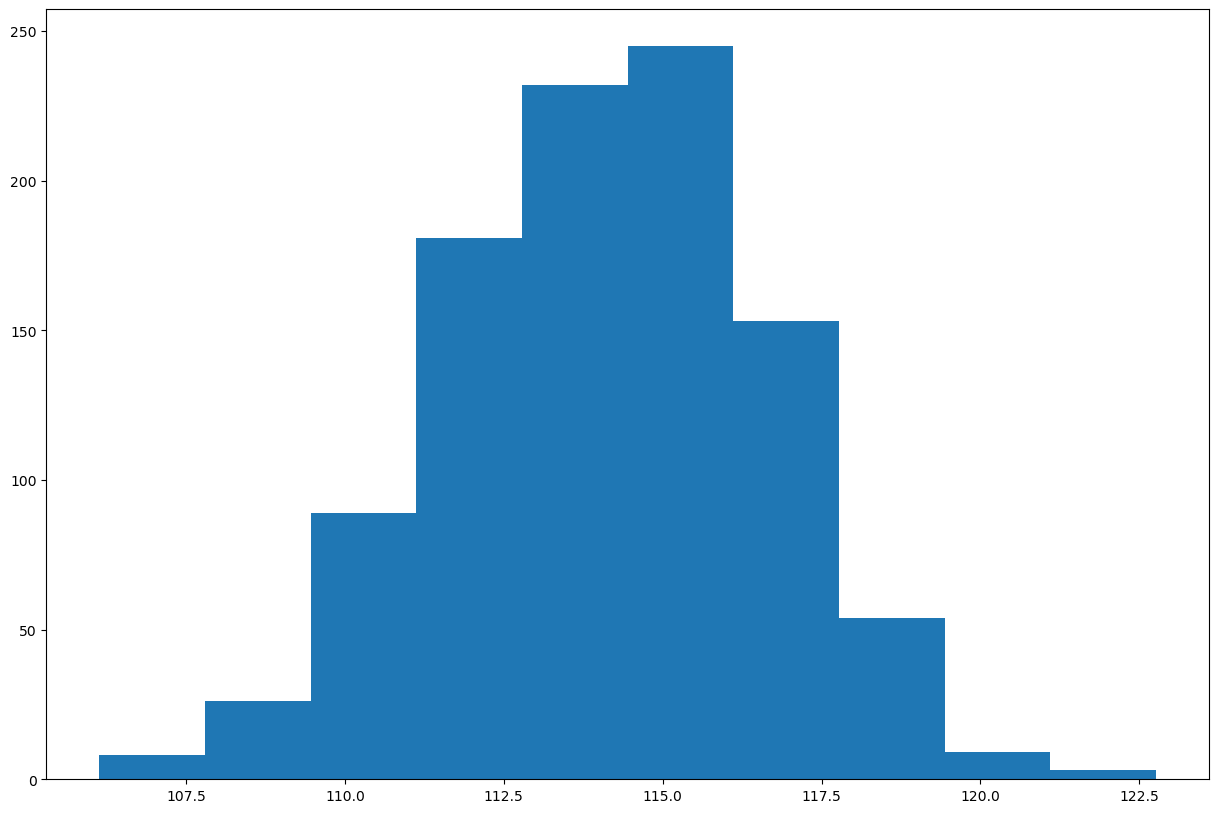

In [64]:
plt.figure(figsize=(15, 10))
plt.hist(sampleMean0)
plt.show()

In [65]:
confidence_interval = st.t.interval(0.95, len(sampleMean0)-1,loc=sampleMean0.mean(), scale=sampleMean0.sem()) 

lower = sampleMean0.quantile(0.05) 
upper = sampleMean0.quantile(0.95)
print(lower)
print(upper)

109.90997007599603
118.06609030501657


## With 95 % confidence I can say sample mean of top 200 wells for region 0 fall between 107 - 116.

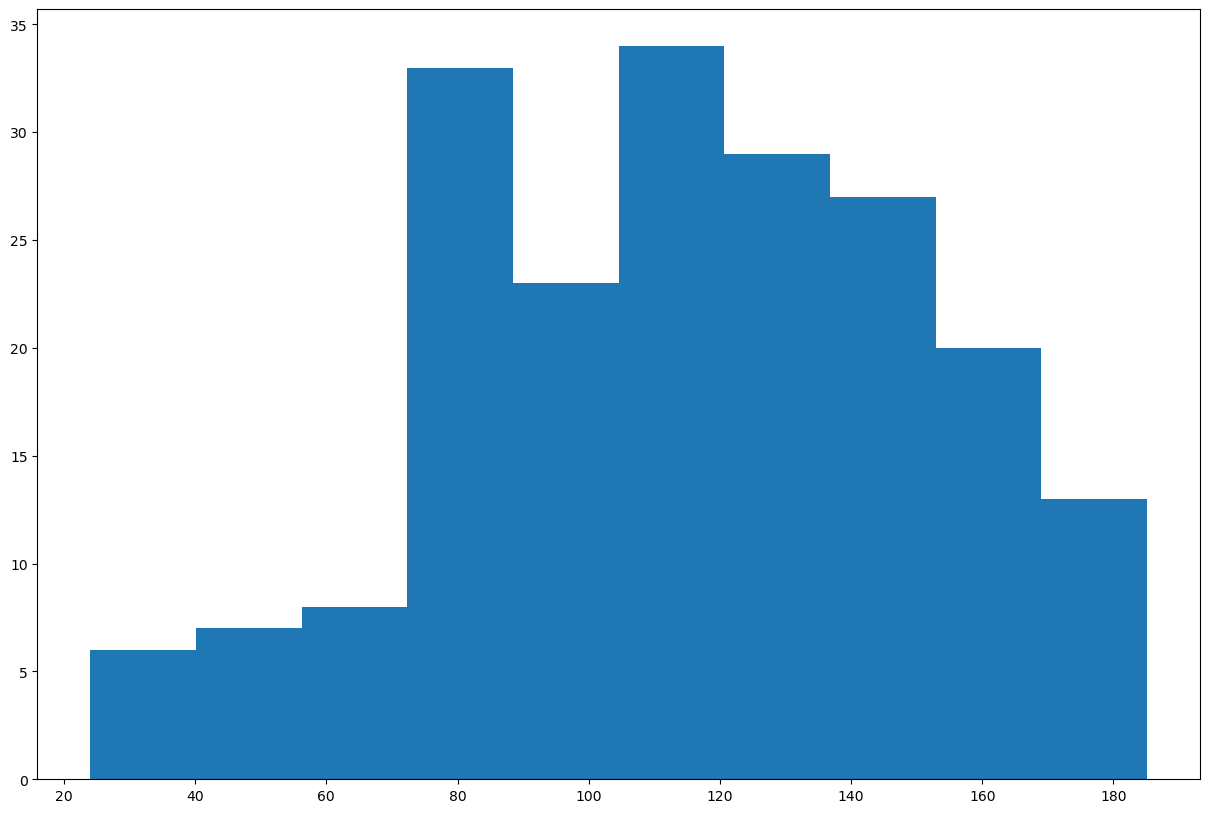

In [66]:
plt.figure(figsize=(15, 10))
plt.hist(data)
plt.show()

In [67]:
print(sampleMean0.std())
print(sampleMean1.std())
print(sampleMean2.std())

2.529832225976524
1.412935411698272
3.0009947410531095


### Region 1 meets the criterea of the loss under 2.5%. So we will choose region 1 to develop new oil well.

## Conclusion:

### Based on our analysis we conclude that 

#### Model Performance: Among the top 200 wells, the model for Region 1 exhibits the lowest mean errors, making it the best-performing model compared to those for other regions.

#### Sample Means: The true mean for Region 2 falls between 118 and 128. For Region 1, it falls between 115 and 120, and for Region 0, it falls between 107 and 116.

#### Profit: Region 1 has the highest profit and it is most profitable for 200 wells followed by region 0 and then region 2. So same follows for average profit for the regions too.

#### Loss Criteria: Region 1 meets the criterion of having a loss under 2.5% and it has highest average profit of 34122. So region 1 is best location to create new well.

#### Based on these findings, Region 1 stands out as the most promising location for a new well due to its superior model performance, highest average profit and least loss. This strategic choice will contribute to OilyGiant's continued success and growth.

